# Wilson Cowan Model

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets
%config InlineBackend.figure_format = 'png'
plt.style.use('default')

## Def necessary functions

In [3]:
def plot_FI_inverse(x, a, theta):
  f, ax = plt.subplots()
  ax.plot(x, F_inv(x, a=a, theta=theta))
  ax.set(xlabel="$x$", ylabel="$F^{-1}(x)$")

In [4]:
def plot_FI_EI(x, FI_exc, FI_inh):
  plt.figure()
  plt.plot(x, FI_exc, 'b', label='E population')
  plt.plot(x, FI_inh, 'r', label='I population')
  plt.legend(loc='lower right')
  plt.xlabel('x (a.u.)')
  plt.ylabel('F(x)')
  plt.show()

In [5]:
def my_plot(t, rE1, rI1, rE2, rI2):

  plt.figure()
  ax1 = plt.subplot(211)
  ax1.plot(pars['range_t'], rE1, 'b', label='E population')
  ax1.plot(pars['range_t'], rI1, 'r', label='I population')
  ax1.set_ylabel('Activity')
  ax1.legend(loc='best')

  ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
  ax2.plot(pars['range_t'], rE2, 'b', label='E population')
  ax2.plot(pars['range_t'], rI2, 'r', label='I population')
  ax2.set_xlabel('t (ms)')
  ax2.set_ylabel('Activity')
  ax2.legend(loc='best')

  plt.tight_layout()
  plt.show()

In [6]:
def plot_nullclines(Exc_null_rE, Exc_null_rI, Inh_null_rE, Inh_null_rI):

  plt.figure()
  plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
  plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')
  plt.legend(loc='best')
  plt.show()

In [7]:
def my_plot_nullcline(pars):
  Exc_null_rE = np.linspace(-0.01, 0.96, 100)
  Exc_null_rI = E_nullcline(Exc_null_rE, **pars)
  Inh_null_rI = np.linspace(-.01, 0.8, 100)
  Inh_null_rE = I_nullcline(Inh_null_rI, **pars)

  plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
  plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')
  plt.legend(loc='best')

In [8]:
def my_plot_vector(pars, my_n_skip=2, myscale=5):
  EI_grid = np.linspace(0., 1., 20)
  rE, rI = np.meshgrid(EI_grid, EI_grid)
  drEdt, drIdt = EIderivs(rE, rI, **pars)

  n_skip = my_n_skip

  plt.quiver(rE[::n_skip, ::n_skip], rI[::n_skip, ::n_skip],
             drEdt[::n_skip, ::n_skip], drIdt[::n_skip, ::n_skip],
             angles='xy', scale_units='xy', scale=myscale, facecolor='c')

  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')

In [9]:
def my_plot_trajectory(pars, mycolor, x_init, mylabel):
  pars = pars.copy()
  pars['rE_init'], pars['rI_init'] = x_init[0], x_init[1]
  rE_tj, rI_tj = simulate_wc(**pars)

  plt.plot(rE_tj, rI_tj, color=mycolor, label=mylabel)
  plt.plot(x_init[0], x_init[1], 'o', color=mycolor, ms=8)
  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')

In [10]:
def my_plot_trajectories(pars, dx, n, mylabel):
  pars = pars.copy()
  for ie in range(n):
    for ii in range(n):
      pars['rE_init'], pars['rI_init'] = dx * ie, dx * ii
      rE_tj, rI_tj = simulate_wc(**pars)
      if (ie == n-1) & (ii == n-1):
          plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8, label=mylabel)
      else:
          plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8)

  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')

In [11]:
def plot_complete_analysis(pars):
  plt.figure(figsize=(7.7, 6.))

  # plot example trajectories
  my_plot_trajectories(pars, 0.2, 6,
                       'Sample trajectories \nfor different init. conditions')
  my_plot_trajectory(pars, 'orange', [0.6, 0.8],
                     'Sample trajectory for \nlow activity')
  my_plot_trajectory(pars, 'm', [0.6, 0.6],
                     'Sample trajectory for \nhigh activity')

  # plot nullclines
  my_plot_nullcline(pars)

  # plot vector field
  EI_grid = np.linspace(0., 1., 20)
  rE, rI = np.meshgrid(EI_grid, EI_grid)
  drEdt, drIdt = EIderivs(rE, rI, **pars)
  n_skip = 2
  plt.quiver(rE[::n_skip, ::n_skip], rI[::n_skip, ::n_skip],
             drEdt[::n_skip, ::n_skip], drIdt[::n_skip, ::n_skip],
             angles='xy', scale_units='xy', scale=5., facecolor='c')

  plt.legend(loc=[1.02, 0.57], handlelength=1)
  plt.show()

In [12]:
def plot_fp(x_fp, position=(0.02, 0.1), rotation=0):
  plt.plot(x_fp[0], x_fp[1], 'ko', ms=8)
  plt.text(x_fp[0] + position[0], x_fp[1] + position[1],
           f'Fixed Point1=\n({x_fp[0]:.3f}, {x_fp[1]:.3f})',
           horizontalalignment='center', verticalalignment='bottom',
           rotation=rotation)

## Def useful functions

### Parameter dictionary

In [13]:
def default_pars(**kwargs):
  pars = {}

  # Excitatory parameters
  pars['tau_E'] = 1.     # Timescale of the E population [ms]
  pars['a_E'] = 1.2      # Gain of the E population
  pars['theta_E'] = 2.8  # Threshold of the E population

  # Inhibitory parameters
  pars['tau_I'] = 2.0    # Timescale of the I population [ms]
  pars['a_I'] = 1.0      # Gain of the I population
  pars['theta_I'] = 4.0  # Threshold of the I population

  # Connection strength
  pars['wEE'] = 9.   # E to E
  pars['wEI'] = 4.   # I to E
  pars['wIE'] = 13.  # E to I
  pars['wII'] = 11.  # I to I

  # External input
  pars['I_ext_E'] = 0.
  pars['I_ext_I'] = 0.

  # simulation parameters
  pars['T'] = 50.        # Total duration of simulation [ms]
  pars['dt'] = .1        # Simulation time step [ms]
  pars['rE_init'] = 0.2  # Initial value of E
  pars['rI_init'] = 0.2  # Initial value of I

  # External parameters if any
  for k in kwargs:
      pars[k] = kwargs[k]

  # Vector of discretized time points [ms]
  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

  return pars

### F-I curve

In [14]:
def F(x, a, theta):
  f = (1 + np.exp(-a * (x - theta)))**-1 - (1 + np.exp(a * theta))**-1
  return f

### Derivative of F-I curve

In [15]:
def dF(x, a, theta):
  dFdx = a * np.exp(-a * (x - theta)) * (1 + np.exp(-a * (x - theta)))**-2
  return dFdx

## Simulation of the Wilson Cowan model

We have integrated the equation numerically by sing the Euler method, the dynamics of E and I populations can be simulated on a time-grid of stepsize Δt. We plotted two trajectories to visualize two simulations with similar initial points.


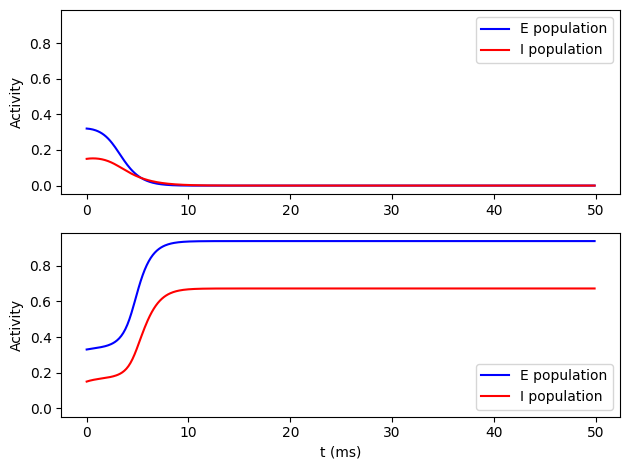

In [16]:
def simulate_wc(tau_E, a_E, theta_E, tau_I, a_I, theta_I,
                wEE, wEI, wIE, wII, I_ext_E, I_ext_I,
                rE_init, rI_init, dt, range_t, **other_pars):

  # Initialize activity arrays
  Lt = range_t.size
  rE = np.append(rE_init, np.zeros(Lt - 1))
  rI = np.append(rI_init, np.zeros(Lt - 1))
  I_ext_E = I_ext_E * np.ones(Lt)
  I_ext_I = I_ext_I * np.ones(Lt)

  # Simulate the Wilson-Cowan equations
  for k in range(Lt - 1):

    # Calculate the derivative of the E population
    drE = dt / tau_E * (-rE[k] + F(wEE * rE[k] - wEI * rI[k] + I_ext_E[k],
                                   a_E, theta_E))

    # Calculate the derivative of the I population
    drI = dt / tau_I * (-rI[k] + F(wIE * rE[k] - wII * rI[k] + I_ext_I[k],
                                   a_I, theta_I))

    # Update using Euler's method
    rE[k + 1] = rE[k] + drE
    rI[k + 1] = rI[k] + drI

  return rE, rI

pars = default_pars()

# Simulate trajectories
rE1, rI1 = simulate_wc(**default_pars(rE_init=.32, rI_init=.15))
rE2, rI2 = simulate_wc(**default_pars(rE_init=.33, rI_init=.15))

with plt.style.context('default'):
  my_plot(pars['range_t'], rE1, rI1, rE2, rI2)

The '.interact' method allows us to plot the trajectories of each population when changing the initial activity.

In [17]:
@widgets.interact(
    rE_init=widgets.FloatSlider(0.32, min=0.30, max=0.35, step=.01))

def plot_EI_diffinitial(rE_init=0.0):

  pars = default_pars(rE_init=rE_init, rI_init=.15)
  rE, rI = simulate_wc(**pars)

  plt.figure()
  plt.plot(pars['range_t'], rE, 'b', label='E population')
  plt.plot(pars['range_t'], rI, 'r', label='I population')
  plt.xlabel('t (ms)')
  plt.ylabel('Activity')
  plt.legend(loc='best')
  plt.show()

interactive(children=(FloatSlider(value=0.32, description='rE_init', max=0.35, min=0.3, step=0.01), Output()),…

## Phase plane analysis

In the second plot, the two activities are against each other at any time point t. The plane is indeed called Phase plane.

In [18]:
pars = default_pars(T=10, rE_init=0.6, rI_init=0.8)
rE, rI = simulate_wc(**pars)

@widgets.interact(
    n_t=widgets.IntSlider(0, min=0, max=len(pars['range_t']) - 1, step=1))

def plot_activity_phase(n_t):
  plt.figure(figsize=(8, 5.5))
  plt.subplot(211)
  plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
  plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
  plt.plot(pars['range_t'][n_t], rE[n_t], 'bo')
  plt.plot(pars['range_t'][n_t], rI[n_t], 'ro')
  plt.axvline(pars['range_t'][n_t], 0, 1, color='k', ls='--')
  plt.xlabel('t (ms)', fontsize=14)
  plt.ylabel('Activity', fontsize=14)
  plt.legend(loc='best', fontsize=14)

  plt.subplot(212)
  plt.plot(rE, rI, 'k')
  plt.plot(rE[n_t], rI[n_t], 'ko')
  plt.xlabel(r'$r_E$', fontsize=18, color='b')
  plt.ylabel(r'$r_I$', fontsize=18, color='r')

  plt.tight_layout()
  plt.show()

interactive(children=(IntSlider(value=0, description='n_t', max=99), Output()), _dom_classes=('widget-interact…

## Computing the nullclines

Implementing the inverse transfer function

<ipython-input-19-2a520b77a65c>:2: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


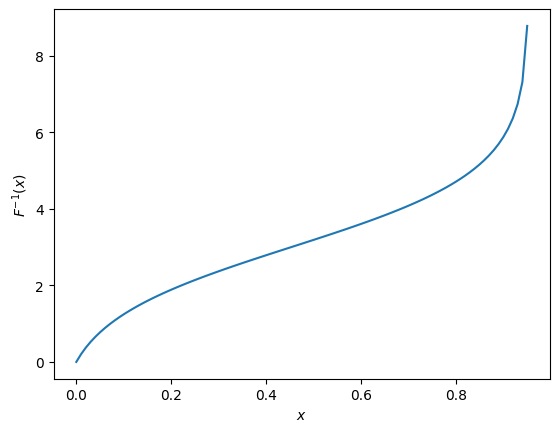

In [19]:
def F_inv(x, a, theta):
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta
  return F_inverse

# Set parameters
pars = default_pars()
x = np.linspace(1e-6, 1, 100)

plot_FI_inverse(x, a=1, theta=3)

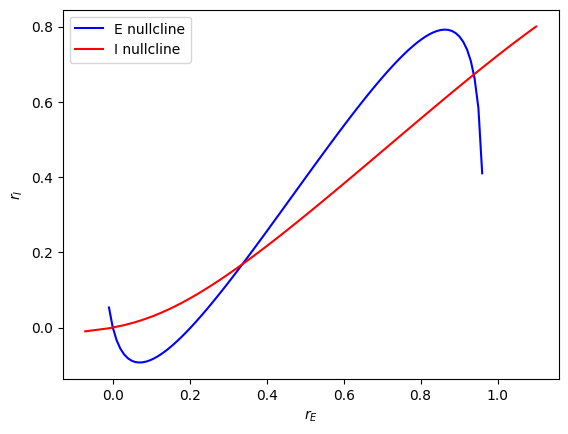

In [20]:
def E_nullcline(rE, a_E, theta_E, wEE, wEI, I_ext_E, **other_pars):
  rI = 1 / wEI * (wEE * rE - F_inv(rE, a_E, theta_E) + I_ext_E)
  return rI

def I_nullcline(rI, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
  rE = 1 / wIE * (wII * rI + F_inv(rI, a_I, theta_I) - I_ext_I)
  return rE

# Set parameters
pars = default_pars()
Exc_null_rE = np.linspace(-0.01, 0.96, 100)
Inh_null_rI = np.linspace(-.01, 0.8, 100)

# Compute nullclines
Exc_null_rI = E_nullcline(Exc_null_rE, **pars)
Inh_null_rE = I_nullcline(Inh_null_rI, **pars)

plot_nullclines(Exc_null_rE, Exc_null_rI, Inh_null_rE, Inh_null_rI)

## Analysing vector field

Computing the derivatives and plotting the vector field.

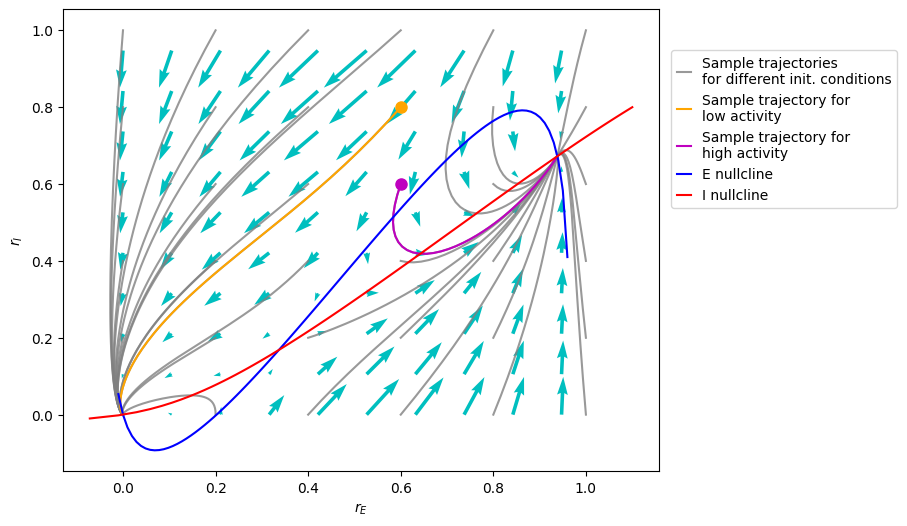

In [21]:
def EIderivs(rE, rI,
             tau_E, a_E, theta_E, wEE, wEI, I_ext_E,
             tau_I, a_I, theta_I, wIE, wII, I_ext_I,
             **other_pars):

  # Compute the derivatives
  drEdt = (-rE + F(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E)) / tau_E
  drIdt = (-rI + F(wIE * rE - wII * rI + I_ext_I, a_I, theta_I)) / tau_I
  return drEdt, drIdt

plot_complete_analysis(default_pars())

Since there are three intersection points, the system has three fixed points, but we need to find their coordinates: a root finding algorithm is helping in this task.

In [22]:
def my_fp(pars, rE_init, rI_init):
  tau_E, a_E, theta_E = pars['tau_E'], pars['a_E'], pars['theta_E']
  tau_I, a_I, theta_I = pars['tau_I'], pars['a_I'], pars['theta_I']
  wEE, wEI = pars['wEE'], pars['wEI']
  wIE, wII = pars['wIE'], pars['wII']
  I_ext_E, I_ext_I = pars['I_ext_E'], pars['I_ext_I']

  # define the right hand of wilson-cowan equations
  def my_WCr(x):

    rE, rI = x
    drEdt = (-rE + F(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E)) / tau_E
    drIdt = (-rI + F(wIE * rE - wII * rI + I_ext_I, a_I, theta_I)) / tau_I
    y = np.array([drEdt, drIdt])

    return y

  x0 = np.array([rE_init, rI_init])
  x_fp = opt.root(my_WCr, x0).x

  return x_fp


def check_fp(pars, x_fp, mytol=1e-6):
  drEdt, drIdt = EIderivs(x_fp[0], x_fp[1], **pars)
  return drEdt**2 + drIdt**2 < mytol

help(my_fp)

Help on function my_fp in module __main__:

my_fp(pars, rE_init, rI_init)



## Fixed points

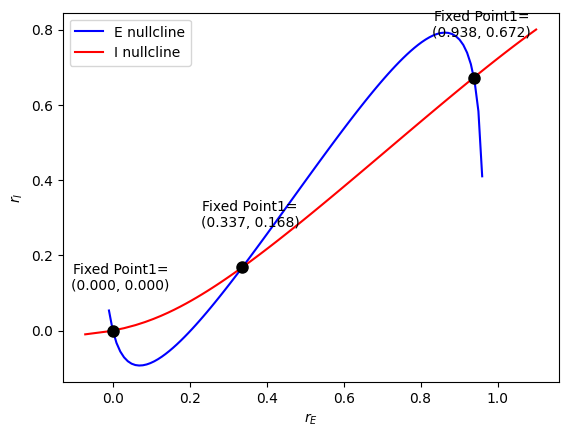

In [23]:
pars = default_pars()
my_plot_nullcline(pars)

# Find the first fixed point
x_fp_1 = my_fp(pars, 0.1, 0.1)
if check_fp(pars, x_fp_1):
   plot_fp(x_fp_1)

# Second
x_fp_2 = my_fp(pars, 0.3, 0.3)
if check_fp(pars, x_fp_2):
   plot_fp(x_fp_2)

# Third
x_fp_3 = my_fp(pars, 0.8, 0.6)
if check_fp(pars, x_fp_3):
   plot_fp(x_fp_3)

## Jacobian matrix

In [24]:
def eig_Jacobian(fp,
                     tau_E, a_E, theta_E, wEE, wEI, I_ext_E,
                     tau_I, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
  rE, rI = fp
  J = np.zeros((2, 2))

  # Compute the four elements of the Jacobian matrix
  J[0, 0] = (-1 + wEE * dF(wEE * rE - wEI * rI + I_ext_E,
                           a_E, theta_E)) / tau_E

  J[0, 1] = (-wEI * dF(wEE * rE - wEI * rI + I_ext_E,
                       a_E, theta_E)) / tau_E

  J[1, 0] = (wIE * dF(wIE * rE - wII * rI + I_ext_I,
                      a_I, theta_I)) / tau_I

  J[1, 1] = (-1 - wII * dF(wIE * rE - wII * rI + I_ext_I,
                           a_I, theta_I)) / tau_I

  # Compute and return the eigenvalues
  evals = np.linalg.eig(J)[0]
  return evals

eig_1 = eig_Jacobian(x_fp_1, **pars)
eig_2 = eig_Jacobian(x_fp_2, **pars)
eig_3 = eig_Jacobian(x_fp_3, **pars)

print(eig_1, 'Stable point')
print(eig_2, 'Unstable point')
print(eig_3, 'Stable point')

[-0.62338386+0.13110957j -0.62338386-0.13110957j] Stable point
[ 1.05720798 -0.87266898] Unstable point
[-0.95956219 -1.42197413] Stable point


The sign of the eigenvalues is determined by the connectivity (interaction) between excitatory and inhibitory populations.

In [25]:
@widgets.interact(
    wEE=widgets.FloatSlider(6., min=6., max=10., step=0.01))

def plot_nullcline_diffwEE(wEE):
  pars = default_pars(wEE=wEE)

  # plot the E, I nullclines
  Exc_null_rE = np.linspace(-0.01, .96, 100)
  Exc_null_rI = E_nullcline(Exc_null_rE, **pars)
  Inh_null_rI = np.linspace(-.01, .8, 100)
  Inh_null_rE = I_nullcline(Inh_null_rI, **pars)

  plt.figure(figsize=(12, 5.5))
  plt.subplot(121)
  plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
  plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
  plt.xlabel(r'$r_E$')
  plt.ylabel(r'$r_I$')
  plt.legend(loc='best')

  plt.tight_layout()
  plt.show()

interactive(children=(FloatSlider(value=6.0, description='wEE', max=10.0, min=6.0, step=0.01), Output()), _dom…

* For low values of wEE there is only one fixed point and it is stable so initial
conditions do not matter and the system always converge to the only fixed point
* For high values of wEE we have three fixed points

I also considered the effects of different weights and the perturbation of the parameters of the gain curve.

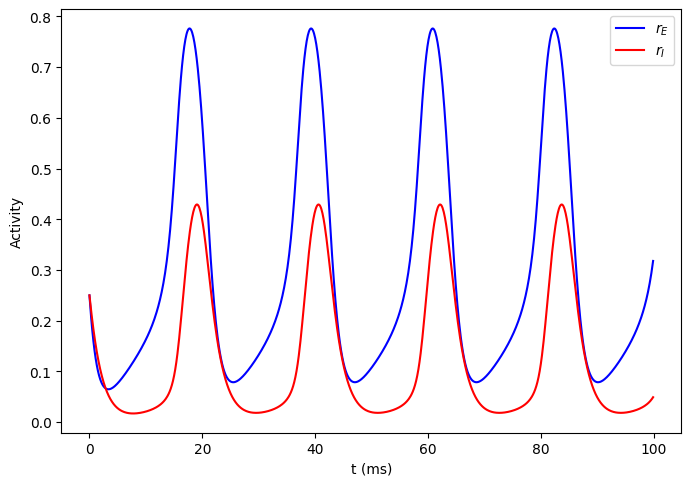

In [26]:
pars = default_pars(T=100.)
pars['wEE'], pars['wEI'] = 6.4, 4.8
pars['wIE'], pars['wII'] = 6.0, 1.2
pars['I_ext_E'] = 0.8
pars['rE_init'], pars['rI_init'] = 0.25, 0.25

rE, rI = simulate_wc(**pars)
plt.figure(figsize=(8, 5.5))
plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
plt.xlabel('t (ms)')
plt.ylabel('Activity')
plt.legend(loc='best')
plt.show()

## Simulating brain activity

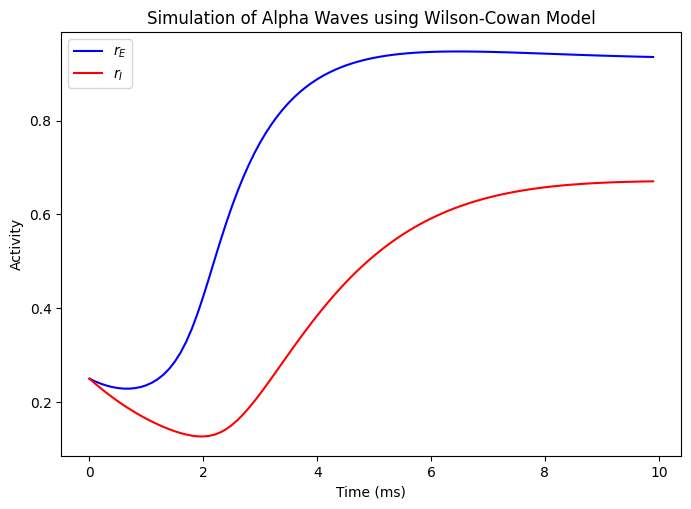

In [31]:
# Set simulation parameters for alpha wave generation
pars = default_pars(T=10.)
pars['wEE'], pars['wEI'] = 9.5, 6.4
pars['wIE'], pars['wII'] = 6.0, 1.2
# Adjust external input to try and elicit alpha rhythms
pars['I_ext_E'] = 1.0
pars['rE_init'], pars['rI_init'] = 0.25, 0.25

# Run the simulation
rE, rI = simulate_wc(**pars)

# Plot the results
plt.figure(figsize=(8, 5.5))
plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
plt.xlabel('Time (ms)')
plt.ylabel('Activity')
plt.legend(loc='best')
plt.title('Simulation of Alpha Waves using Wilson-Cowan Model')
plt.show()

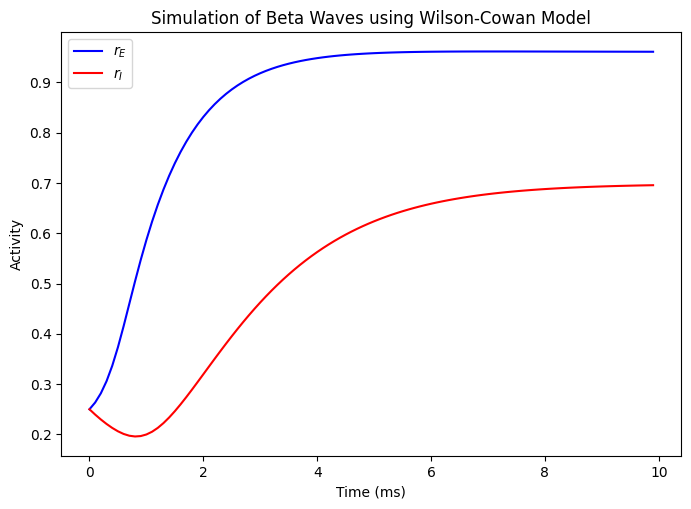

In [28]:
# Set simulation parameters for beta wave generation
pars = default_pars(T=10.)
pars['wEE'], pars['wEI'] = 10.5, 6.4
pars['wIE'], pars['wII'] = 6.0, 1.2
# Increase external input to excitatory neurons to simulate active cognitive processes
pars['I_ext_E'] = 1.5
pars['rE_init'], pars['rI_init'] = 0.25, 0.25

# Run the simulation
rE, rI = simulate_wc(**pars)

# Plot the results
plt.figure(figsize=(8, 5.5))
plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
plt.xlabel('Time (ms)')
plt.ylabel('Activity')
plt.legend(loc='best')
plt.title('Simulation of Beta Waves using Wilson-Cowan Model')
plt.show()

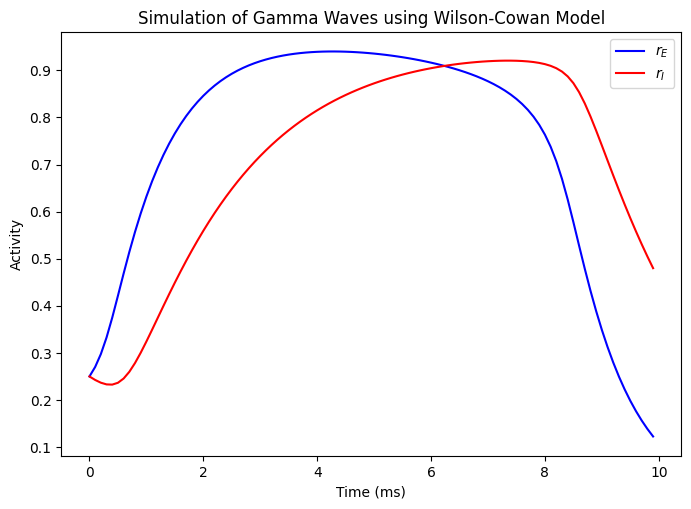

In [29]:
# Set simulation parameters for gamma wave generation
pars = default_pars(T=10.)
pars['wEE'], pars['wEI'] = 12.0, 9.0
pars['wIE'], pars['wII'] = 10.0, 2.0
# External input to excitatory neurons should be optimized for gamma wave simulation
pars['I_ext_E'] = 2.0
pars['rE_init'], pars['rI_init'] = 0.25, 0.25

# Run the simulation
rE, rI = simulate_wc(**pars)

# Plot the results
plt.figure(figsize=(8, 5.5))
plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
plt.xlabel('Time (ms)')
plt.ylabel('Activity')
plt.legend(loc='best')
plt.title('Simulation of Gamma Waves using Wilson-Cowan Model')
plt.show()


## Simulating epilepsy

For simulating epilepsy-related neural oscillations, one might adjust the model parameters to reflect conditions that could lead to seizure-like activity, such as an imbalance between excitatory and inhibitory neural interactions.

The simulation involves running the Wilson-Cowan model with the adjusted parameters over time, observing the network's behavior. Key indicators of seizure-like activity include:

* Hyper-synchronization: The model should
show periods of highly synchronized neuronal firing, reflecting the hallmark of epileptic seizures.
* Transient Dynamics: There should be clear transitions into and out of seizure states, with potentially normal activity interspersed with episodes of hyperactivity.

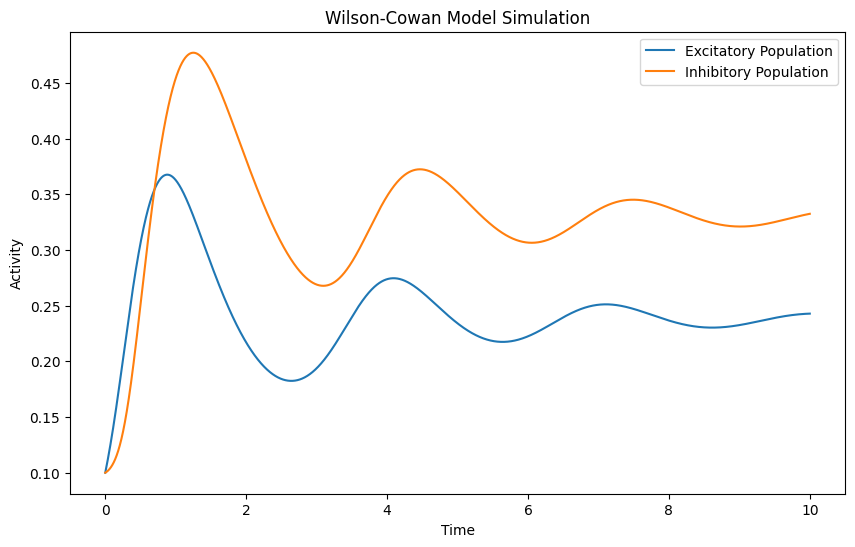

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def wilson_cowan_model(y, t, params):
    E, I = y  # Excitatory and inhibitory population activities
    wEE, wEI, wIE, wII, I_ext_E, I_ext_I, a_E, a_I, theta_E, theta_I = params

    # Wilson-Cowan equations
    dE_dt = -E + (1 - E) * a_E * logistic(wEE * E - wEI * I + I_ext_E - theta_E)
    dI_dt = -I + (1 - I) * a_I * logistic(wIE * E - wII * I + I_ext_I - theta_I)

    return [dE_dt, dI_dt]

def logistic(x):
    return 1 / (1 + np.exp(-x))

# Parameters
wEE = 16
wEI = 12
wIE = 15
wII = 3
I_ext_E = 3
I_ext_I = 0
a_E = 1.3
a_I = 2
theta_E = 4
theta_I = 3.7

params = (wEE, wEI, wIE, wII, I_ext_E, I_ext_I, a_E, a_I, theta_E, theta_I)

# Initial conditions: E and I population activities
y0 = [0.1, 0.1]

# Time vector
t = np.linspace(0, 10, 10000)

# Solve differential equations
solution = odeint(wilson_cowan_model, y0, t, args=(params,))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='Excitatory Population')
plt.plot(t, solution[:, 1], label='Inhibitory Population')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend()
plt.title('Wilson-Cowan Model Simulation')
plt.show()
